# Purpose: Subject-Level Feature Analysis

1. **Effect Size Calculation**
   - Computes subject-level Cohen's d for all interventions
   - Generates intervention ranking heatmaps

2. **Statistical Testing**
   - Repeated measures ANOVA across stimulation conditions
   - Paired comparisons of interventions vs SHAM2
   - One-sample t-test on intervention effects (vs. 0)

3. **Visualization**
   - Pre/Post comparison boxplots
   - Effect size distributions
   - Best/Worst/Average intervention comparisons


=== Analysis for SSV ===


c:\Users\jhunt\AppData\Local\Programs\Python\Python313\Lib\site-packages\pingouin\effsize.py:778: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to " "paired == False.")


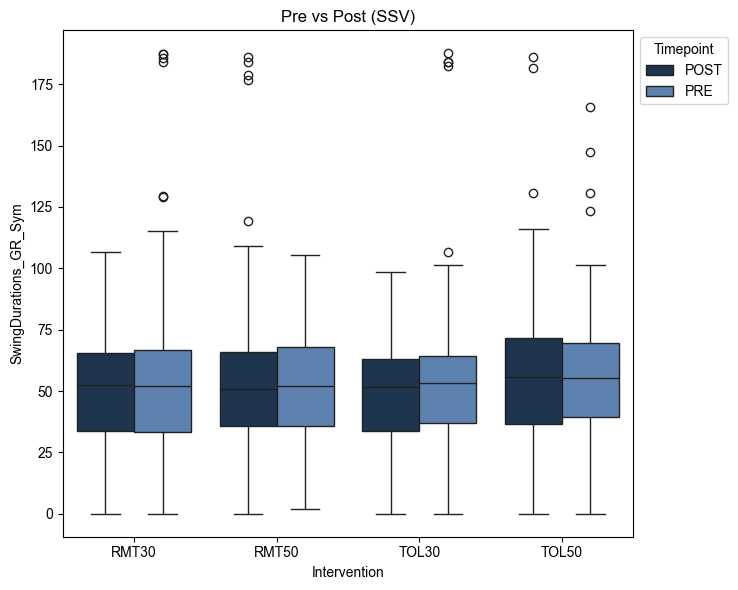

C:\Users\jhunt\AppData\Local\Temp\ipykernel_9288\708120828.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Intervention', y='CohenD', data=cohen_d_df, order=stim_interventions, palette=palette_list)


1-way ANOVA (Intervention, stim only):
         Source         SS  DF        MS         F     p-unc       ng2  \
0  Intervention   1.163222   3  0.387741  1.633763  0.191647  0.053964   
1         Error  13.527796  57  0.237330       NaN       NaN       NaN   

        eps  
0  0.827606  
1       NaN  


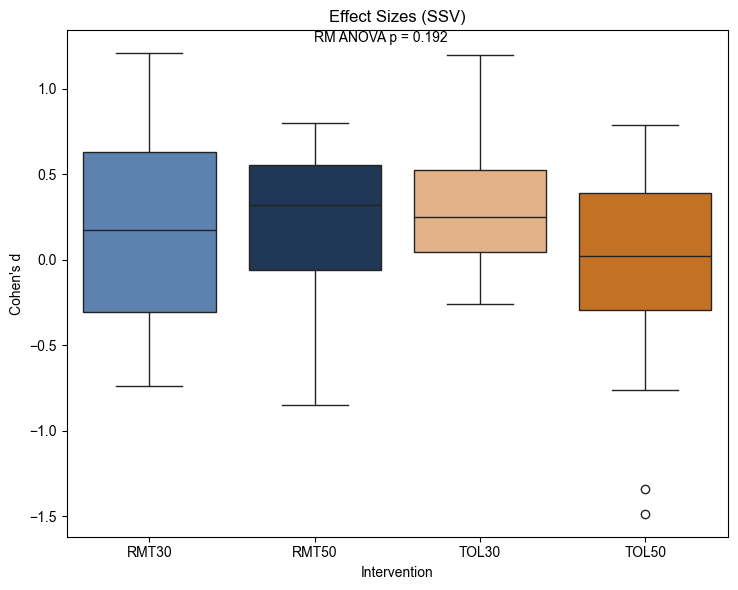

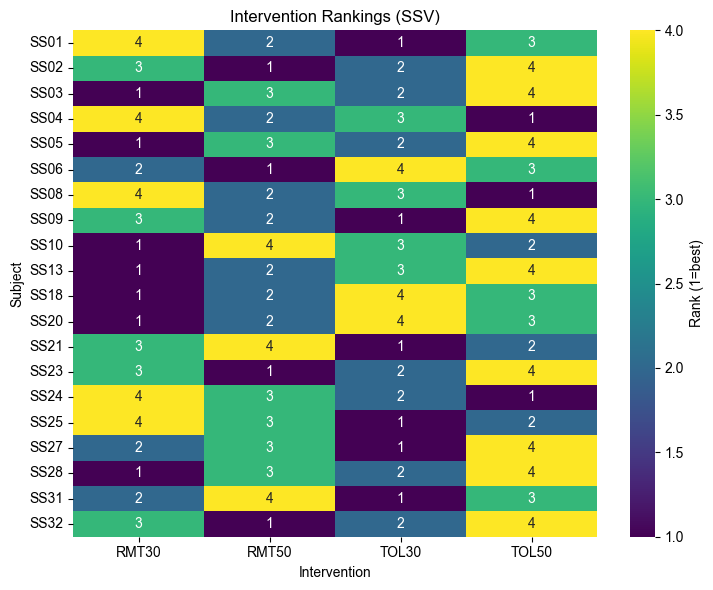

Best vs SHAM2:
               T  dof alternative     p-val         CI95%   cohen-d     BF10  \
T-test  5.028929   19   two-sided  0.000075  [0.39, 0.93]  1.566106  361.683   

           power  
T-test  0.999998  
Worst vs SHAM2:
               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -2.612219   19   two-sided  0.017132  [-0.6, -0.07]  0.657821  3.282   

           power  
T-test  0.796881  
Avg vs SHAM2:
               T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test  1.698283   19   two-sided  0.105772  [-0.04, 0.4]  0.429612  0.785   

           power  
T-test  0.446014  


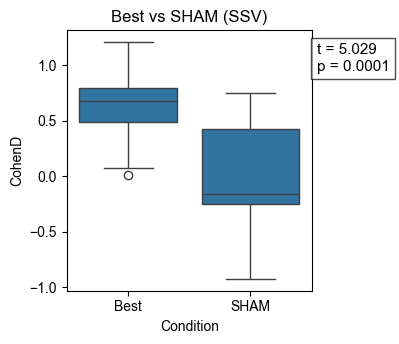

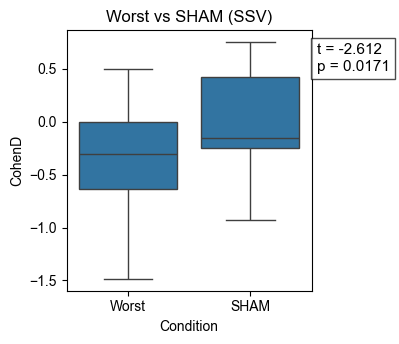

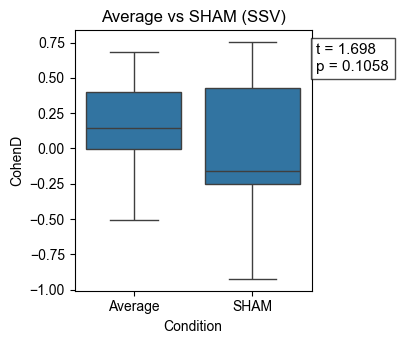

One-sample t-test (Average Cohen's d > 0) across stimulation interventions: t = 2.423, p = 0.0128


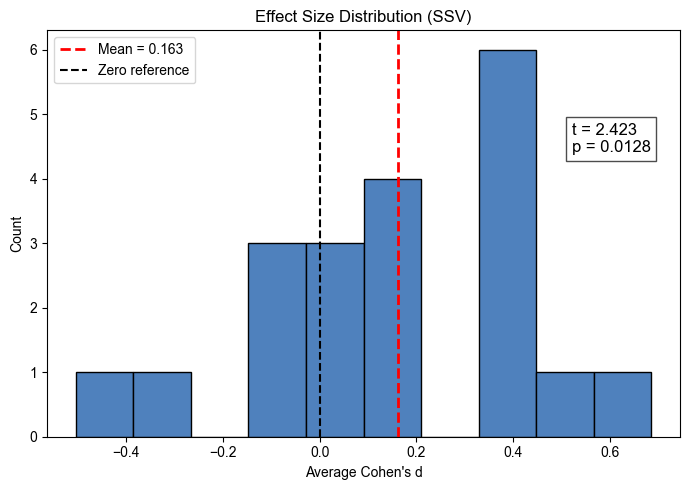


=== Analysis for FV ===


c:\Users\jhunt\AppData\Local\Programs\Python\Python313\Lib\site-packages\pingouin\effsize.py:778: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to " "paired == False.")


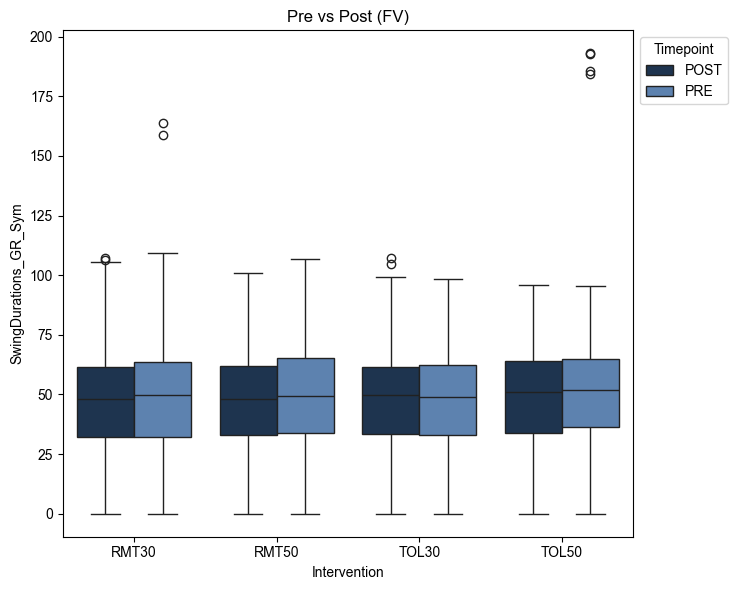

C:\Users\jhunt\AppData\Local\Temp\ipykernel_9288\708120828.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Intervention', y='CohenD', data=cohen_d_df, order=stim_interventions, palette=palette_list)


1-way ANOVA (Intervention, stim only):
         Source         SS  DF        MS         F     p-unc       ng2  \
0  Intervention   1.270392   3  0.423464  1.658599  0.186114  0.049796   
1         Error  14.552915  57  0.255314       NaN       NaN       NaN   

        eps  
0  0.894301  
1       NaN  


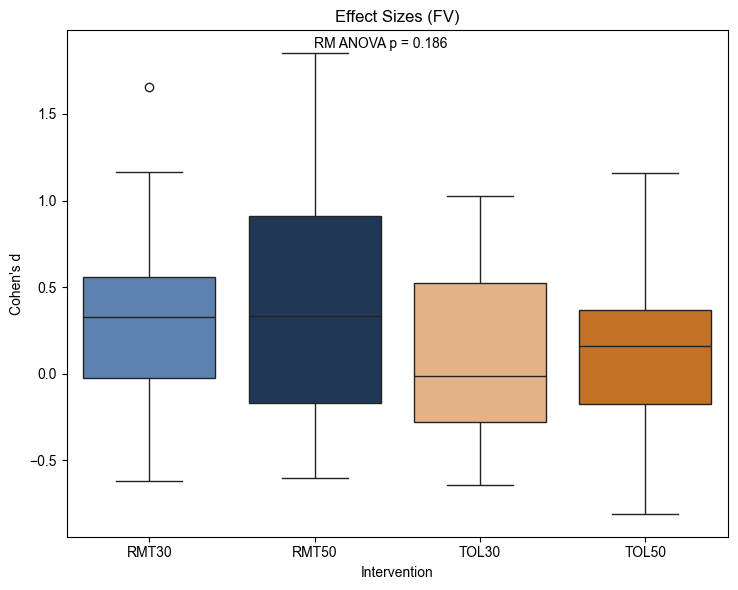

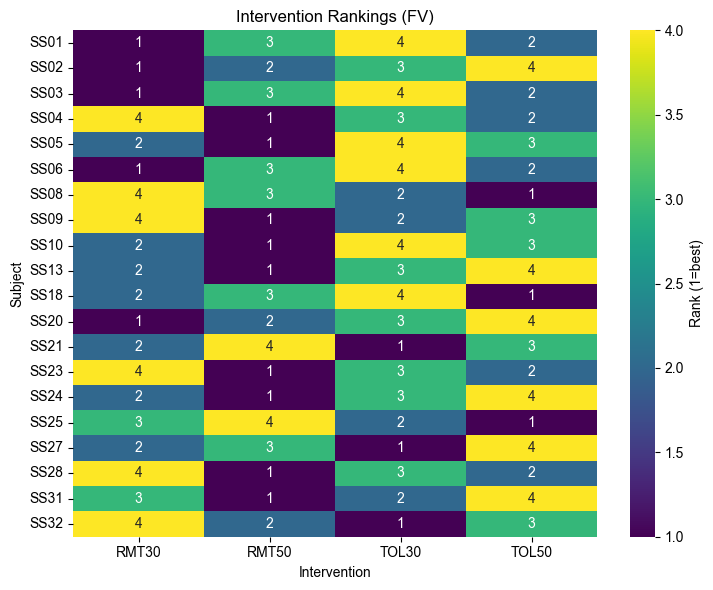

Best vs SHAM2:
               T  dof alternative    p-val         CI95%  cohen-d    BF10  \
T-test  3.286694   19   two-sided  0.00388  [0.19, 0.84]  0.90039  11.377   

           power  
T-test  0.968269  
Worst vs SHAM2:
               T  dof alternative     p-val          CI95%   cohen-d    BF10  \
T-test -3.529657   19   two-sided  0.002239  [-0.79, -0.2]  0.876578  18.208   

           power  
T-test  0.960402  
Avg vs SHAM2:
               T  dof alternative   p-val          CI95%   cohen-d   BF10  \
T-test -0.014731   19   two-sided  0.9884  [-0.29, 0.29]  0.003832  0.232   

          power  
T-test  0.05003  


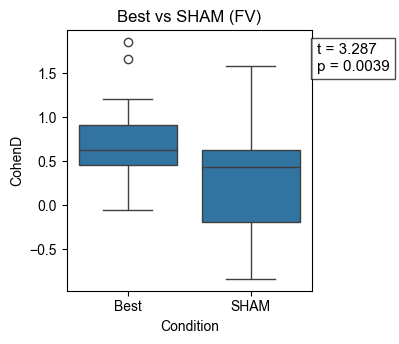

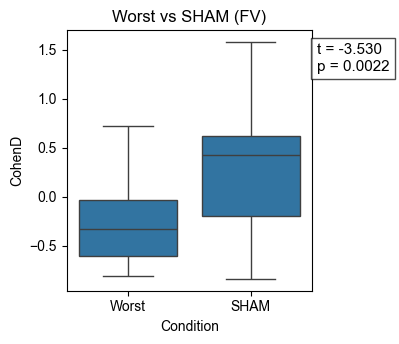

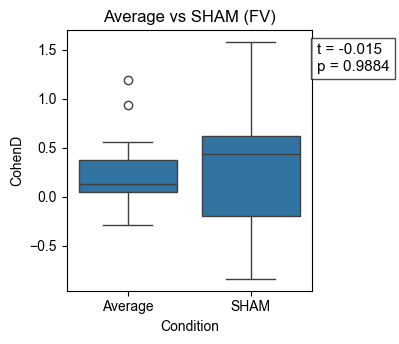

One-sample t-test (Average Cohen's d > 0) across stimulation interventions: t = 3.010, p = 0.0036


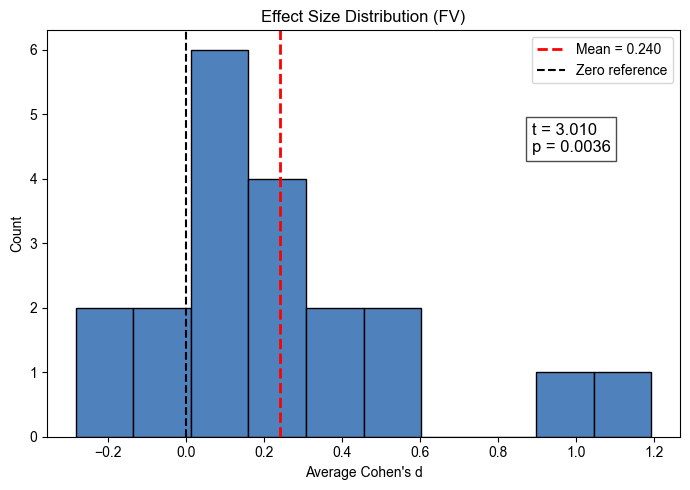

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, ttest_1samp
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import os
from pathlib import Path
import matplotlib as mpl

# Define current feature for analysis
feature_name = 'SwingDurations_GR_Sym' # from CSV column header
speeds = ['SSV', 'FV']
interventions = ['SHAM2', 'RMT30', 'RMT50', 'TOL30', 'TOL50']

# Load data 
allCycles_df = pd.read_csv(f"Y:/LabMembers/MTillman/SavedOutcomes/StrokeSpinalStim/Overground_EMG_Kinematics/MergedTablesAffectedUnaffected/matchedCycles.csv")

# Set font for plots
mpl.rcParams['font.family'] = 'Arial'

# Loop over each speed for analysis
for speed in speeds:
    print(f"\n=== Analysis for {speed} ===")
    
    # Initialize save location
    output_dir = Path(f"Y:/LabMembers/J_Hunt/SS_Stroke/Per_Feature/Results/{speed}/{feature_name}")
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Prep data for this speed
    df = allCycles_df[allCycles_df['Speed'] == speed].copy()
    df = df[df['Intervention'].isin(interventions)]
    
    # Define stim interventions (exclude SHAM)
    stim_interventions = [i for i in interventions if 'SHAM' not in i]
    df_stim = df[df['Intervention'].isin(stim_interventions)]
    
    # Function to compute subject-level Cohen's d for given interventions
    def compute_cohen_d_by_subject(dataframe, interventions_list):
        rows = []
        for subj in dataframe['Subject'].unique():
            for inter in interventions_list:
                temp = dataframe[(dataframe['Subject'] == subj) & (dataframe['Intervention'] == inter)]
                pre = temp[temp['PrePost'] == 'PRE'][feature_name]
                post = temp[temp['PrePost'] == 'POST'][feature_name]
                if len(pre) > 0 and len(post) > 0:
                    d = pg.compute_effsize(pre, post, paired=True, eftype='cohen')
                    rows.append({'Subject': subj, 'Intervention': inter, 'CohenD': d})
        return pd.DataFrame(rows)

    # Compute Cohen's d for this speed
    cohen_d_stim = compute_cohen_d_by_subject(df, stim_interventions)
    cohen_d_all = compute_cohen_d_by_subject(df, interventions)
    
    # Figure 1: Pre vs Post
    plt.figure(figsize=(7.48, 6.0)) # Double column width 
    sns.boxplot(x='Intervention', y=feature_name, hue='PrePost', data=df_stim,
                order=stim_interventions, palette={'PRE': '#4F81BD', 'POST': '#163357'})
    plt.title(f"Pre vs Post ({speed})", fontname='Arial')
    plt.xlabel('Intervention', fontname='Arial')
    plt.ylabel(feature_name, fontname='Arial')
    plt.legend(title='Timepoint', prop={'family':'Arial'}, loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"pre_post_{speed}.svg"))
    plt.show()

    # Figure 2: Effect Sizes
    cohen_d_df = cohen_d_stim.copy()
    plt.figure(figsize=(7.48, 6.0))
    palette_list = ['#4F81BD', '#17375E', '#F3B07A', '#DD700A']
    if len(stim_interventions) > len(palette_list):
        palette_list = cm.get_cmap('tab10', len(stim_interventions)).colors
    sns.boxplot(x='Intervention', y='CohenD', data=cohen_d_df, order=stim_interventions, palette=palette_list)
    plt.title(f"Effect Sizes ({speed})", fontname='Arial')
    plt.xlabel('Intervention', fontname='Arial')
    plt.ylabel("Cohen's d", fontname='Arial')

    aov1 = pg.rm_anova(dv='CohenD', within='Intervention', subject='Subject', data=cohen_d_df, detailed=True)
    print('1-way ANOVA (Intervention, stim only):')
    print(aov1)
    p_val = aov1['p-GG-corr'][0] if 'p-GG-corr' in aov1.columns else aov1['p-unc'][0]
    plt.text(plt.xlim()[1]*0.4, plt.ylim()[1]*0.95, f"RM ANOVA p = {p_val:.3f}", ha='center', fontsize=10, fontname='Arial')

    # Check if p-value is significant for post-hoc tests
    if p_val < 0.05:
        posthoc = pg.pairwise_ttests(dv='CohenD', within='Intervention', subject='Subject', data=cohen_d_df, padjust='bonf')
        print('Post-hoc pairwise tests (stim only):')
        print(posthoc)
        posthoc.to_csv(os.path.join(output_dir, f"stat_posthoc_pairwise_{feature_name}_{speed}.csv"), index=False)

        # Annotate significant comparisons on the effect-size boxplot
        def add_sig_bar(x1, x2, y, p_val, h=0.05, text_height=0.02):
            plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
            if p_val < 0.001: text='***'
            elif p_val < 0.01: text='**'
            elif p_val < 0.05: text='*'
            else: text=f"p={p_val:.3f}"
            plt.text((x1+x2)*0.5, y+h+text_height, text, ha='center', va='bottom', fontsize=9)

        y_max = cohen_d_df['CohenD'].max() if not cohen_d_df.empty else 0
        step = (plt.ylim()[1] - plt.ylim()[0]) * 0.1
        current_y = y_max + step
        i_lookup = {inter: i for i, inter in enumerate(stim_interventions)}
        for _, row in posthoc.iterrows():
            if row.get('p-corr', 1) < 0.05:
                x1, x2 = i_lookup[row['A']], i_lookup[row['B']]
                add_sig_bar(x1, x2, current_y, row['p-corr'])
                current_y += step

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"effect_sizes_{speed}.svg"))
    plt.show()

    # Figure 3: Rankings
    rank_df = cohen_d_df.copy()
    rank_df['Rank'] = rank_df.groupby('Subject')['CohenD'].rank(ascending=False, method='min')
    heatmap_data = rank_df.pivot(index='Subject', columns='Intervention', values='Rank')
    plt.figure(figsize=(7.48,6.0))
    sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='viridis', 
                cbar_kws={'label':'Rank (1=best)'}, annot_kws={'fontname':'Arial'})
    plt.title(f"Intervention Rankings ({speed})", fontname='Arial')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"rankings_{speed}.svg"))
    plt.show()

    # Save stats 
    cohen_d_df.to_csv(os.path.join(output_dir, f"cohens_d_{speed}.csv"), index=False)
    aov1.to_csv(os.path.join(output_dir, f"anova_{speed}.csv"))

    # Helper function for creating melted dataframe for paired comparisons
    def make_melted(series1, series2, label1, label2):
        df = pd.DataFrame({
            'Subject': series1.index,
            label1: series1.values,
            label2: series2.values
        })
        return pd.melt(df, id_vars=['Subject'], var_name='Condition', value_name='CohenD')

    # Figures 5-7: SHAM Comparisons
    stim_conds = [i for i in interventions if 'SHAM' not in i]
    sham2 = cohen_d_all[cohen_d_all['Intervention'] == 'SHAM2'].set_index('Subject')

    # Best/worst/avg stim per subject
    best_idx = cohen_d_all[cohen_d_all['Intervention'].isin(stim_conds)].groupby('Subject')['CohenD'].idxmax()
    worst_idx = cohen_d_all[cohen_d_all['Intervention'].isin(stim_conds)].groupby('Subject')['CohenD'].idxmin()
    best_vals = cohen_d_all.loc[best_idx].set_index('Subject')
    worst_vals = cohen_d_all.loc[worst_idx].set_index('Subject')
    avg_stim = cohen_d_all[cohen_d_all['Intervention'].isin(stim_conds)].groupby('Subject')['CohenD'].mean()

    # Paired tests 
    best_vs_sham2 = pg.ttest(best_vals['CohenD'], sham2['CohenD'].reindex(best_vals.index), paired=True)
    worst_vs_sham2 = pg.ttest(worst_vals['CohenD'], sham2['CohenD'].reindex(worst_vals.index), paired=True)
    avg_vs_sham2 = pg.ttest(avg_stim, sham2['CohenD'].reindex(avg_stim.index), paired=True)
    print('Best vs SHAM2:')
    print(best_vs_sham2)
    print('Worst vs SHAM2:')
    print(worst_vs_sham2)
    print('Avg vs SHAM2:')
    print(avg_vs_sham2)

    # Figure 4: Best vs SHAM
    best_melted = make_melted(best_vals['CohenD'], sham2['CohenD'], 'Best', 'SHAM')
    plt.figure(figsize=(3.54,3.54))
    sns.boxplot(x='Condition', y='CohenD', data=best_melted)
    plt.title(f"Best vs SHAM ({speed})", fontname='Arial')
    ax = plt.gca()
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])
    t_row = best_vs_sham2.iloc[0] if hasattr(best_vs_sham2, 'iloc') else best_vs_sham2
    ax.text(1.02, 0.95, f"t = {t_row['T']:.3f}\np = {t_row['p-val']:.4f}", ha='left', va='top', fontsize=11, fontname='Arial', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"best_vs_sham_{speed}.svg"), bbox_inches='tight')
    plt.show()

    # Figure 5: Worst vs SHAM
    worst_melted = make_melted(worst_vals['CohenD'], sham2['CohenD'], 'Worst', 'SHAM')
    plt.figure(figsize=(3.54,3.54))
    sns.boxplot(x='Condition', y='CohenD', data=worst_melted)
    plt.title(f"Worst vs SHAM ({speed})", fontname='Arial')
    ax = plt.gca()
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])
    t_row = worst_vs_sham2.iloc[0] if hasattr(worst_vs_sham2, 'iloc') else worst_vs_sham2
    ax.text(1.02, 0.95, f"t = {t_row['T']:.3f}\np = {t_row['p-val']:.4f}", ha='left', va='top', fontsize=11, fontname='Arial', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"worst_vs_sham_{speed}.svg"), bbox_inches='tight')
    plt.show()

    # Figure 6: Average vs SHAM
    avg_melted = make_melted(avg_stim, sham2['CohenD'], 'Average', 'SHAM')
    plt.figure(figsize=(3.54,3.54))
    sns.boxplot(x='Condition', y='CohenD', data=avg_melted)
    plt.title(f"Average vs SHAM ({speed})", fontname='Arial')
    ax = plt.gca()
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])
    t_row = avg_vs_sham2.iloc[0] if hasattr(avg_vs_sham2, 'iloc') else avg_vs_sham2
    ax.text(1.02, 0.95, f"t = {t_row['T']:.3f}\np = {t_row['p-val']:.4f}", ha='left', va='top', fontsize=11, fontname='Arial', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"avg_vs_sham_{speed}.svg"), bbox_inches='tight')
    plt.show()

    # Save comparison stats
    best_vs_sham2.to_csv(os.path.join(output_dir, f"best_vs_sham_{speed}.csv"), index=False)
    worst_vs_sham2.to_csv(os.path.join(output_dir, f"worst_vs_sham_{speed}.csv"), index=False)
    avg_vs_sham2.to_csv(os.path.join(output_dir, f"avg_vs_sham_{speed}.csv"), index=False)

    # Distribution plot
    avg_cohen_d_df = avg_stim.reset_index().rename(columns={'CohenD': 'AvgCohenD'})
    t_stat, p_val_ttest = ttest_1samp(avg_cohen_d_df['AvgCohenD'], popmean=0, alternative='greater')
    print(f"One-sample t-test (Average Cohen's d > 0) across stimulation interventions: t = {t_stat:.3f}, p = {p_val_ttest:.4f}")
    avg_cohen_d_df.to_csv(os.path.join(output_dir, f"avg_cohen_d_stim_{feature_name}_{speed}.csv"), index=False)
    with open(os.path.join(output_dir, f"ttest_avg_cohen_d_stim_{feature_name}_{speed}.csv"), 'w') as f:
        f.write(f"One-sample t-test (Avg Cohen's d > 0) results:\n")
        f.write(f"t = {t_stat:.3f}\n")
        f.write(f"p = {p_val_ttest:.4f}\n")

    mean_val = np.mean(avg_cohen_d_df['AvgCohenD'])
    plt.figure(figsize=(7,5))
    plt.hist(avg_cohen_d_df['AvgCohenD'], bins=10, color='#4F81BD', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.3f}')
    plt.axvline(0, color='black', linestyle='--', label='Zero reference')
    plt.text(x=plt.xlim()[1]*0.7, y=plt.ylim()[1]*0.7, 
             s=f"t = {t_stat:.3f}\np = {p_val_ttest:.4f}", 
             fontsize=12, fontname='Arial', bbox=dict(facecolor='white', alpha=0.7))
    plt.legend()
    plt.title(f"Effect Size Distribution ({speed})", fontname='Arial')
    plt.xlabel("Average Cohen's d")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"effect_distribution_{speed}.svg"))
    plt.show()